In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import os
import sys

In [ ]:
dataset=pd.DataFrame(columns=['features'])

In [ ]:
dataset_new=pd.DataFrame(columns=['labels'])

In [ ]:
cnt=0
n_cnt=0

In [ ]:
DATA = '/content/drive/MyDrive/Miniproject/DATASET/English'

In [ ]:
dir=os.listdir(DATA)

In [ ]:
dir

['MaleAngry',
 'MaleHappy',
 'MaleSad',
 'MaleNeutral',
 'FemaleAngry',
 'FemaleHappy',
 'FemaleSad',
 'FemaleNeutral']

In [ ]:
for i in dir:
    k=DATA+'/'+i
    j=os.listdir(k)
    for g in j:
        if(i[4]=='s' or i[4]=='S' or i[6]=='s' or i[6]=='S'):
            dataset_new.loc[n_cnt]='Sad'
        elif(i[4]=='n' or i[4]=='N' or i[6]=='n' or i[6]=='N'):
            dataset_new.loc[n_cnt]='Neutral'
        elif(i[4]=='a' or i[4]=='A' or i[6]=='a' or i[6]=='A'):
            dataset_new.loc[n_cnt]='Angry'
        elif(i[4]=='h' or i[4]=='H' or i[6]=='h' or i[6]=='H'):
            dataset_new.loc[n_cnt]='Happy'
        
        n_cnt=n_cnt+1
        u=k+'/'+g
        print(k+'/'+g)
        X,sample_rate=librosa.load(u,res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
        sample_rate=np.array([sample_rate])
        mfcc=librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13)
        mfcc=np.mean(mfcc,axis=0)
        #mfcc=[mfcc]
        dataset.loc[cnt]=[mfcc]
        cnt=cnt+1

/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry26.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry28.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry25.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry27.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry30.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry29.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry32.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry31.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry33.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry35.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry34.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry36.wav
/content/drive/MyDrive/Miniproject/DATASET/English/MaleAngry/MaleAngry9.wav


In [ ]:
dataset = pd.concat([dataset_new,pd.DataFrame(dataset['features'].values.tolist())],axis=1)

In [ ]:
dataset

,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,Angry,-16.414091,-12.807028,-11.764467,-8.431463,-3.564120,-0.845265,-2.253844,0.127563,1.663393,0.581787,-0.594931,0.354256,0.064931,-2.988268,-2.947625,-2.533035,-4.481946,-5.312790,-4.806788,-4.541685,-5.012650,-3.132883,-6.707428,-8.199464,-6.609217,-5.948102,-4.968184,-5.705691,-7.307010,-10.044321,-8.853357,-10.004927,-8.568701,-9.094290,-10.675599,-6.062039,-2.274050,-1.999361,-2.740924,...,-7.019797,-7.625874,-9.081565,-10.377628,-13.530747,-11.157769,-10.402462,-10.547135,-10.065311,-11.352360,-13.538991,-13.777434,-14.448925,-12.578969,-12.531216,-12.419521,-13.927512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angry,0.376056,0.000850,1.273784,2.466390,2.056747,1.405028,1.097857,1.525090,3.805091,3.228485,2.577110,1.905036,1.465192,3.033627,3.002241,1.345464,1.415301,2.112417,2.728945,3.822813,2.775958,-1.964725,-4.624813,-7.977941,-8.602065,-6.656493,-3.489139,-0.795420,0.377629,0.536064,0.541908,-0.041482,-0.314825,-0.915403,-1.488000,-2.842944,1.983250,5.223917,6.284027,...,-8.752234,-8.725377,-9.712202,-10.591917,-7.815973,-6.849728,-6.294823,-3.736903,-3.022717,-1.502573,-1.402705,-1.403724,-0.531021,0.077285,-0.910599,0.202306,1.100807,0.317658,-0.950341,-1.190407,0.570198,1.132791,-0.150665,0.601701,0.199288,0.658230,0.850944,1.211826,-0.365547,-1.846451,-1.349202,-1.565620,-2.828225,-4.115277,-4.347994,-4.116226,-4.621443,-3.861538,-1.795121,-0.746907
2,Angry,-18.065746,-19.220079,-20.317329,-20.856367,-20.394985,-18.616261,-19.659039,-18.777308,-15.879754,-16.143068,-15.869661,-9.984034,-6.612175,-5.852620,-6.126651,-7.406218,-7.323847,-7.404250,-5.749791,-6.548927,-5.912208,-6.430942,-6.134647,-4.469849,-5.978792,-7.339756,-6.611168,-6.625318,-7.016503,-8.320202,-5.639336,-5.704157,-9.270675,-12.007643,-10.264428,-10.047471,-11.887834,-9.252459,-8.800851,...,-1.138220,-2.984129,-3.286739,-3.319815,-4.099044,-4.539824,-4.014122,-3.972011,-4.237689,-3.161868,-2.853792,-3.379591,-3.145716,-3.048456,-5.294572,-4.391278,-2.100987,-2.195766,-4.104060,-6.827705,-7.856207,-10.412466,-7.264656,-7.344765,-10.137211,-12.526875,-12.349775,-8.779163,-4.966130,-5.177330,-7.235049,-6.965291,-7.662517,-6.143242,-4.494637,-5.305740,-6.723966,-4.562036,-2.946747,1.458535
3,Angry,-12.935157,-12.567801,-10.896049,-10.276363,-12.225001,-12.170829,-13.625395,-15.283596,-12.491048,-11.320009,-11.696092,-14.521458,-13.704412,-11.413039,-11.529623,-12.686697,-10.893401,-3.428252,-0.665172,-1.481904,-1.630417,1.339591,0.203390,-2.133764,-2.408893,-1.588626,-2.341184,-3.923381,-5.168541,-3.597244,-3.734568,0.537951,3.766593,3.105037,11.535079,12.897147,10.150024,6.678744,3.049626,...,1.076922,0.962150,2.175362,0.622530,0.467987,1.113790,0.072322,-0.139861,0.226775,0.101954,0.649967,0.213861,0.366668,-2.763220,-5.292899,-5.440188,-6.678510,-9.401626,-8.653566,-5.839061,-4.080806,-0.683837,1.405961,0.995871,1.409514,2.236581,1.325068,1.396336,1.562460,1.472094,0.935438,0.750734,1.414274,1.392579,0.645330,0.990256,0.817554,0.434604,1.798948,5.119405
4,Angry,-1.530420,-2.863430,-6.602247,-8.081483,-7.872797,-6.034759,-4.791504,-5.094658,-4.400574,-4.330380,-5.362004,-7.358887,-8.280565,-8.466749,-8.044075,-8.995782,-10.923862,-15.560228,-17.607790,-18.037394,-14.507715,-7.155973,-3.469168,-3.944642,-5.375957,-6.695809,-6.354531,-5.525364,-2.638115,-1.472597,-2.687393,0.820622,2.110123,1.410118,-0.467623,-3.878658,-6.647750,-7.402840,-9.742219,...,-1.294641,-2.251306,-2.343395,-2.009866,-1.183881,-0.504341,-1.183390,-0.941688,-2.403792,-2.611862,-3.187617,-4.092660,-4.222780,-3.830427,-5.291793,-4.919675,-5.672066,-4.380569,-4.267721,-3.501857,-3.298032,-3.237027,-2.766246,-4.239726,-3.588122,-4.449461,-4.257594,-

In [ ]:
X=dataset.iloc[:,1:217]

In [ ]:
y=dataset.iloc[:,0]


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,-16.414091,-12.807028,-11.764467,-8.431463,-3.564120,-0.845265,-2.253844,0.127563,1.663393,0.581787,-0.594931,0.354256,0.064931,-2.988268,-2.947625,-2.533035,-4.481946,-5.312790,-4.806788,-4.541685,-5.012650,-3.132883,-6.707428,-8.199464,-6.609217,-5.948102,-4.968184,-5.705691,-7.307010,-10.044321,-8.853357,-10.004927,-8.568701,-9.094290,-10.675599,-6.062039,-2.274050,-1.999361,-2.740924,-3.487230,...,-7.019797,-7.625874,-9.081565,-10.377628,-13.530747,-11.157769,-10.402462,-10.547135,-10.065311,-11.352360,-13.538991,-13.777434,-14.448925,-12.578969,-12.531216,-12.419521,-13.927512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.376056,0.000850,1.273784,2.466390,2.056747,1.405028,1.097857,1.525090,3.805091,3.228485,2.577110,1.905036,1.465192,3.033627,3.002241,1.345464,1.415301,2.112417,2.728945,3.822813,2.775958,-1.964725,-4.624813,-7.977941,-8.602065,-6.656493,-3.489139,-0.795420,0.377629,0.536064,0.541908,-0.041482,-0.314825,-0.915403,-1.488000,-2.842944,1.983250,5.223917,6.284027,4.890445,...,-8.752234,-8.725377,-9.712202,-10.591917,-7.815973,-6.849728,-6.294823,-3.736903,-3.022717,-1.502573,-1.402705,-1.403724,-0.531021,0.077285,-0.910599,0.202306,1.100807,0.317658,-0.950341,-1.190407,0.570198,1.132791,-0.150665,0.601701,0.199288,0.658230,0.850944,1.211826,-0.365547,-1.846451,-1.349202,-1.565620,-2.828225,-4.115277,-4.347994,-4.116226,-4.621443,-3.861538,-1.795121,-0.746907
2,-18.065746,-19.220079,-20.317329,-20.856367,-20.394985,-18.616261,-19.659039,-18.777308,-15.879754,-16.143068,-15.869661,-9.984034,-6.612175,-5.852620,-6.126651,-7.406218,-7.323847,-7.404250,-5.749791,-6.548927,-5.912208,-6.430942,-6.134647,-4.469849,-5.978792,-7.339756,-6.611168,-6.625318,-7.016503,-8.320202,-5.639336,-5.704157,-9.270675,-12.007643,-10.264428,-10.047471,-11.887834,-9.252459,-8.800851,-13.045695,...,-1.138220,-2.984129,-3.286739,-3.319815,-4.099044,-4.539824,-4.014122,-3.972011,-4.237689,-3.161868,-2.853792,-3.379591,-3.145716,-3.048456,-5.294572,-4.391278,-2.100987,-2.195766,-4.104060,-6.827705,-7.856207,-10.412466,-7.264656,-7.344765,-10.137211,-12.526875,-12.349775,-8.779163,-4.966130,-5.177330,-7.235049,-6.965291,-7.662517,-6.143242,-4.494637,-5.305740,-6.723966,-4.562036,-2.946747,1.458535
3,-12.935157,-12.567801,-10.896049,-10.276363,-12.225001,-12.170829,-13.625395,-15.283596,-12.491048,-11.320009,-11.696092,-14.521458,-13.704412,-11.413039,-11.529623,-12.686697,-10.893401,-3.428252,-0.665172,-1.481904,-1.630417,1.339591,0.203390,-2.133764,-2.408893,-1.588626,-2.341184,-3.923381,-5.168541,-3.597244,-3.734568,0.537951,3.766593,3.105037,11.535079,12.897147,10.150024,6.678744,3.049626,-0.406082,...,1.076922,0.962150,2.175362,0.622530,0.467987,1.113790,0.072322,-0.139861,0.226775,0.101954,0.649967,0.213861,0.366668,-2.763220,-5.292899,-5.440188,-6.678510,-9.401626,-8.653566,-5.839061,-4.080806,-0.683837,1.405961,0.995871,1.409514,2.236581,1.325068,1.396336,1.562460,1.472094,0.935438,0.750734,1.414274,1.392579,0.645330,0.990256,0.817554,0.434604,1.798948,5.119405
4,-1.530420,-2.863430,-6.602247,-8.081483,-7.872797,-6.034759,-4.791504,-5.094658,-4.400574,-4.330380,-5.362004,-7.358887,-8.280565,-8.466749,-8.044075,-8.995782,-10.923862,-15.560228,-17.607790,-18.037394,-14.507715,-7.155973,-3.469168,-3.944642,-5.375957,-6.695809,-6.354531,-5.525364,-2.638115,-1.472597,-2.687393,0.820622,2.110123,1.410118,-0.467623,-3.878658,-6.647750,-7.402840,-9.742219,-9.388671,...,-1.294641,-2.251306,-2.343395,-2.009866,-1.183881,-0.504341,-1.183390,-0.941688,-2.403792,-2.611862,-3.187617,-4.092660,-4.222780,-3.830427,-5.291793,-4.919675,-5.672066,-4.380569,-4.267721,-3.501857,-3.298032,-3.237027,-2.766246,-4.239726,-3.588122,-4.44

In [ ]:
y

0         Angry
1         Angry
2         Angry
3         Angry
4         Angry
         ...   
4335    Neutral
4336    Neutral
4337    Neutral
4338    Neutral
4339    Neutral
Name: labels, Length: 4340, dtype: object

In [ ]:
X=X.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
mean=np.mean(X_train)
std=np.std(X_train)
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = 44100 * 2.5
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=44100
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = speedNpitch(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=44100, n_mfcc=30)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X

In [ ]:
ref=pd.DataFrame(columns=['path'])
xx=0

In [ ]:
for i in dir:
    k=DATA+'/'+i
    j=os.listdir(k)
    for g in j:
        ref.loc[xx]=k+'/'+g
        xx=xx+1

In [ ]:
from tqdm import tqdm, tqdm_pandas

In [ ]:
mfcc=prepare_data(ref, n = 30, aug = 0, mfcc = 1)

100%|██████████| 4340/4340 [04:28<00:00, 16.14it/s]


In [ ]:
mfcc

array([[[[-5.85806519e+02],
         [-5.85806519e+02],
         [-5.85806519e+02],
         ...,
         [-5.85806519e+02],
         [-5.85806519e+02],
         [-5.85806519e+02]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        ...,

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [

In [ ]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , y
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

**2D CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras import models
from keras.models import Model
from keras import optimizers
from keras.optimizers import Adam

In [ ]:
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(4, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = Adam(0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
    return model

In [ ]:
model=get_2d_conv_model(30)

In [ ]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=100)

Epoch 1/100
204/204 - 93s - loss: 1.4466 - acc: 0.3539 - val_loss: 1.3269 - val_acc: 0.3696
Epoch 2/100
204/204 - 87s - loss: 1.1171 - acc: 0.5100 - val_loss: 0.9654 - val_acc: 0.5834
Epoch 3/100
204/204 - 87s - loss: 0.9508 - acc: 0.5969 - val_loss: 0.8628 - val_acc: 0.6396
Epoch 4/100
204/204 - 88s - loss: 0.8127 - acc: 0.6747 - val_loss: 0.7848 - val_acc: 0.6719
Epoch 5/100
204/204 - 87s - loss: 0.7290 - acc: 0.7186 - val_loss: 0.7989 - val_acc: 0.6811
Epoch 6/100
204/204 - 87s - loss: 0.5991 - acc: 0.7711 - val_loss: 0.7347 - val_acc: 0.7041
Epoch 7/100
204/204 - 88s - loss: 0.5206 - acc: 0.8028 - val_loss: 0.4644 - val_acc: 0.8369
Epoch 8/100
204/204 - 91s - loss: 0.4654 - acc: 0.8212 - val_loss: 0.5637 - val_acc: 0.7548
Epoch 9/100
204/204 - 88s - loss: 0.4046 - acc: 0.8578 - val_loss: 0.3980 - val_acc: 0.8645
Epoch 10/100
204/204 - 88s - loss: 0.3560 - acc: 0.8777 - val_loss: 0.3549 - val_acc: 0.8774
Epoch 11/100
204/204 - 89s - loss: 0.3001 - acc: 0.8934 - val_loss: 0.3494 - va

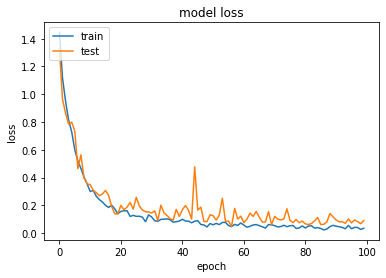

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

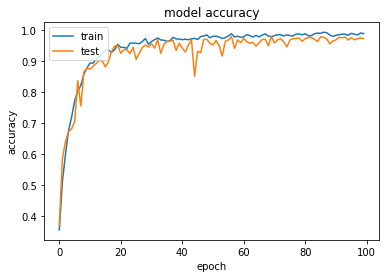

In [ ]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()